<a href="https://colab.research.google.com/github/Dr-Carlos-Villasenor/TRSeminar/blob/main/TRS04_Poly_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Seminar
## Dr. Carlos Vilaseñor
## Polynomial regression

In [1]:
# Basic modules
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

# Sklearn modules
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

Create sintetic data

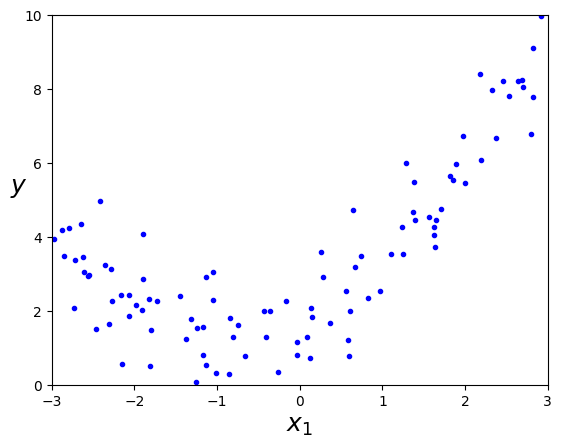

In [3]:
# seed
np.random.seed(42)

# random samples
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# draw data
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

Polynomial features

In [ ]:
# Create polynomial features object
poly_features = PolynomialFeatures(degree=3, include_bias=False)

# Transform data
X_poly = poly_features.fit_transform(X)

# Let's compare them
print(X[0])
print(X_poly[0])

In [5]:
# Create scaler
scaler = StandardScaler()

# Scale polinomial features
X_poly_scaled = scaler.fit_transform(X_poly)

Let's create a linear regressor with the polynomial features

$$\hat{y} = \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \beta_0$$

In [ ]:
# Create model
lin_reg = LinearRegression()

# fit model
lin_reg.fit(X_poly_scaled, y)

6. Draw model

In [ ]:
# interpolate points from -3 to 3
X_new=np.linspace(-3, 3, 100).reshape(100, 1)

# Expand polynomial features
X_new_poly = poly_features.transform(X_new)

# scale expanded data
X_new_poly_scaled = scaler.transform(X_new_poly)

# make new predictions
y_new = lin_reg.predict(X_new_poly_scaled)

# draw original points
plt.plot(X, y, "b.")

# draw regression line
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

# add labels
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Make a particular prediction

In [ ]:
print(lin_reg.predict(scaler.transform(poly_features.transform([[1.5]]))))

We can work in a better way if we use pipeline

In [14]:
# polynomial degree
degree = 300

# Create model
model = Pipeline([("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
                  ("std_scaler", StandardScaler()),
                  ("lin_reg", LinearRegression())])

Let's try to fit the new model

In [ ]:
# Train model
model.fit(X, y)

# Calculate model performance (r2_score)
print('r2-score: ', model.score(X, y))

# Draw output
y_new = model.predict(X_new)
plt.plot(X_new, y_new, 'r--', label=str(degree), linewidth=2)
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.axis([-3, 3, 0, 10])
plt.show()

Repeat the experiment with 1 and 300 degree

## Generalization


In [ ]:
# Split dataset 75% to train and 25% to test
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

# print shapes
print("Entrada original: ", X.shape)
print("Entrada entrenamiento: ", xtrain.shape)
print("Entrada prueba: ", xtest.shape)

print("Salida original: ", y.shape)
print("Salida entrenamiento: ", ytrain.shape)
print("Salida prueba: ", ytest.shape)

Here you have a copy of the code, but using the partition to show generalization

In [ ]:
degree = 300


model = Pipeline([("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
                  ("std_scaler", StandardScaler()),
                  ("lin_reg", LinearRegression())])

model.fit(xtrain, ytrain)

print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

y_new = model.predict(X_new)
plt.plot(X_new, y_new, 'k--', label='modelo', linewidth=2)
plt.plot(xtrain, ytrain, "b.", label='train', linewidth=3)
plt.plot(xtest, ytest, "r.",label='test', linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.axis([-3, 3, 0, 10])
plt.show()